In [21]:
#package Install
!pip3 install textblob
!pip install wordcloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
plt.style.use('fivethirtyeight')

In [1]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
import tweepy
import csv
import datetime
import time
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import nltk
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [2]:
def collect_data(dates):
    date_initial = [['2019-11-30', '2020-05-30',5000]]
    for i in range(len(date_initial)):
        print(date_initial[i][0],date_initial[i][1],date_initial[i][2])
        df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('"stress + since:"'+ date_initial[i][0] +'"until:"'+ date_initial[i][1] + '"lang:en"').get_items(), date_initial[i][2]))
    print(dates)
    print(len(dates))
    for i in range(len(dates)):
        print(dates[i][0],dates[i][1],dates[i][2])
        df=df.append(pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('"stress + since:"'+ dates[i][0] +'"until:"'+ dates[i][1] + '"lang:en"').get_items(), dates[i][2])))
        
    print(df)    
    df.to_csv("tweets102.csv", index=False)
    return df

In [3]:
date_list = [['2020-05-30','2020-11-30',10000],['2020-11-30','2021-05-30',10000],['2021-05-30','2021-10-15',5000]]
collect_data(date_list)

2019-11-30 2020-05-30 5000
[['2020-05-30', '2020-11-30', 10000], ['2020-11-30', '2021-05-30', 10000], ['2021-05-30', '2021-10-15', 5000]]
3
2020-05-30 2020-11-30 10000
2020-11-30 2021-05-30 10000
2021-05-30 2021-10-15 5000
                                                    url  \
0     https://twitter.com/kinanabb/status/1266519684...   
1     https://twitter.com/bsprntr2b/status/126651967...   
2     https://twitter.com/Lisaandbarry777/status/126...   
3     https://twitter.com/ultlingzi/status/126651965...   
4     https://twitter.com/fichuntie/status/126651965...   
...                                                 ...   
4995  https://twitter.com/_jazzydimplezz/status/1448...   
4996  https://twitter.com/iamtoriwells/status/144874...   
4997  https://twitter.com/StleKvale/status/144874733...   
4998  https://twitter.com/Learner4ever01/status/1448...   
4999  https://twitter.com/jduke4/status/144874731458...   

                          date  \
0    2020-05-29 23:59:58+00:00   


,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/kinanabb/status/1266519684...,2020-05-29 23:59:58+00:00,cover letters stress me out :),cover letters stress me out :),1266519684695969792,"{'username': 'kinanabb', 'id': 747911479282794...",1,1,5,0,...,None,None,None,NaN,None,None,None,None,None,None
1,https://twitter.com/bsprntr2b/status/126651967...,2020-05-29 23:59:56+00:00,@StuBishop_LPD Thanks and prayers to you and y...,@StuBishop_LPD Thanks and prayers to you and y...,1266519678769344512,"{'username': 'bsprntr2b', 'id': 31551973, 'dis...",0,0,1,0,...,None,None,None,1.266515e+18,"{'username': 'StuBishop_LPD', 'id': 1119839482...","[{'username': 'StuBishop_LPD', 'id': 111983948...",None,None,None,None
2,https://twitter.com/Lisaandbarry777/status/126...,2020-05-29 23:59:52+00:00,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,1266519659039395840,"{'username': 'Lisaandbarry777', 'id': 91679958...",0,1,2,0,...,None,None,None,1.266355e+18,"{'username': 'JoyceWhiteVance', 'id': 54838445...","[{'username': 'JoyceWhiteVance', 'id': 5483844...",None,None,None,None
3,https://twitter.com/ultlingzi/status/126651965...,2020-05-29 23:59:51+00:00,@cezkiethh Im trying like im really stressed 😭,@cezkiethh Im trying like im really stressed 😭,1266519656841568258,"{'username': 'ultlingzi', 'id': 12592257299480...",1,0,1,0,...,None,None,None,1.266519e+18,"{'username': 'kietchh', 'id': 118997793, 'disp...",None,None,None,None,None
4,https://twitter.com/fichuntie/status/126651965...,2020-05-29 23:59:51+00:00,@WynterStorm24 take care of yourself! this str...,@WynterStorm24 take care of yourself! this str...,1266519654773776384,"{'username': 'fichuntie', 'id': 10802272365093...",0,0,0,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/tweet...,None,None,1.266454e+18,"{'username': 'WynterStorm24', 'id': 8945600768...","[{'username': 'WynterStorm24', 'id': 894560076...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://twitter.com/_jazzydimplezz/status/1448...,2021-10-14 20:27:38+00:00,I’m stressed tf out,I’m stressed tf out,1448747346381074436,"{'username': '_jazzydimplezz', 'id': 104191704...",0,0,0,0,...,None,None,None,NaN,None,None,None,None,None,None
4996,https://twitter.com/iamtoriwells/status/144874...,2021-10-14 20:27:35+00:00,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,1448747335333425153,"{'username': 'iamtoriwells', 'id': 146147326, ...",0,0,0,0,...,None,None,None,NaN,None,None,None,None,None,None
4997,https://twitter.com/StleKvale/status/144874733...,2021-10-14 20:27:35+00:00,"@dawn15765 Yes you learn of course, but they a...","@dawn15765 Yes you learn of course, but they a...",1448747335278804997,"{'username': 'StleKvale', 'id': 331904434, 'di...",0,0,1,0,...,None,None,None,1.448747e+18,"{'username': 'dawn15765', 'id': 13032401923090...","[{'username': 'dawn15765', 'id': 1303240192309...",None,None,None,None
4998,https://twitter.com/Learner4ever01/status/1448...,2021-10-14 20:27:31+00:00,@MTradess Most important step has been achieve...,@MTradess Most important step has been achieve...,1448747316169658372,"{'username': 'Learner4ever01', 'id': 142849267...",0,0,1,0,...,None,None,None,NaN,None,"[{'username': 'MTradess', 'id': 13321256494656...",None,None,None,None


In [4]:
read_df = pd.read_csv('tweets102.csv')

In [5]:
read_df

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/kinanabb/status/1266519684...,2020-05-29 23:59:58+00:00,cover letters stress me out :),cover letters stress me out :),1266519684695969792,"{'username': 'kinanabb', 'id': 747911479282794...",1,1,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/bsprntr2b/status/126651967...,2020-05-29 23:59:56+00:00,@StuBishop_LPD Thanks and prayers to you and y...,@StuBishop_LPD Thanks and prayers to you and y...,1266519678769344512,"{'username': 'bsprntr2b', 'id': 31551973, 'dis...",0,0,1,0,...,NaN,NaN,NaN,1.266515e+18,"{'username': 'StuBishop_LPD', 'id': 1119839482...","[{'username': 'StuBishop_LPD', 'id': 111983948...",NaN,NaN,NaN,NaN
2,https://twitter.com/Lisaandbarry777/status/126...,2020-05-29 23:59:52+00:00,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,1266519659039395840,"{'username': 'Lisaandbarry777', 'id': 91679958...",0,1,2,0,...,NaN,NaN,NaN,1.266355e+18,"{'username': 'JoyceWhiteVance', 'id': 54838445...","[{'username': 'JoyceWhiteVance', 'id': 5483844...",NaN,NaN,NaN,NaN
3,https://twitter.com/ultlingzi/status/126651965...,2020-05-29 23:59:51+00:00,@cezkiethh Im trying like im really stressed 😭,@cezkiethh Im trying like im really stressed 😭,1266519656841568258,"{'username': 'ultlingzi', 'id': 12592257299480...",1,0,1,0,...,NaN,NaN,NaN,1.266519e+18,"{'username': 'kietchh', 'id': 118997793, 'disp...",NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/fichuntie/status/126651965...,2020-05-29 23:59:51+00:00,@WynterStorm24 take care of yourself! this str...,@WynterStorm24 take care of yourself! this str...,1266519654773776384,"{'username': 'fichuntie', 'id': 10802272365093...",0,0,0,0,...,[{'thumbnailUrl': 'https://pbs.twimg.com/tweet...,NaN,NaN,1.266454e+18,"{'username': 'WynterStorm24', 'id': 8945600768...","[{'username': 'WynterStorm24', 'id': 894560076...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/_jazzydimplezz/status/1448...,2021-10-14 20:27:38+00:00,I’m stressed tf out,I’m stressed tf out,1448747346381074436,"{'username': '_jazzydimplezz', 'id': 104191704...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,https://twitter.com/iamtoriwells/status/144874...,2021-10-14 20:27:35+00:00,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,1448747335333425153,"{'username': 'iamtoriwells', 'id': 146147326, ...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,https://twitter.com/StleKvale/status/144874733...,2021-10-14 20:27:35+00:00,"@dawn15765 Yes you learn of course, but they a...","@dawn15765 Yes you learn of course, but they a...",1448747335278804997,"{'username': 'StleKvale', 'id': 331904434, 'di...",0,0,1,0,...,NaN,NaN,NaN,1.448747e+18,"{'username': 'dawn15765', 'id': 13032401923090...","[{'username': 'dawn15765', 'id': 1303240192309...",NaN,NaN,NaN,NaN
29998,https://twitter.com/Learner4ever01/status/1448...,2021-10-14 20:27:31+00:00,@MTradess Most important step has been achieve...,@MTradess Most important step has been achieve...,1448747316169658372,"{'username': 'Learner4ever01', 'id': 142849267...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,"[{'username': 'MTradess', 'id': 13321256494656...",NaN,NaN,NaN,NaN


In [6]:
#Data cleaning
df_clean = read_df.drop(['media', 'retweetedTweet','quotedTweet','inReplyToTweetId','inReplyToUser','hashtags','cashtags','mentionedUsers','tcooutlinks','outlinks','sourceUrl','source', 'quoteCount', 'coordinates','renderedContent'],axis=1)
              

In [7]:
df_clean

,url,date,content,id,user,replyCount,retweetCount,likeCount,conversationId,lang,sourceLabel,place
0,https://twitter.com/kinanabb/status/1266519684...,2020-05-29 23:59:58+00:00,cover letters stress me out :),1266519684695969792,"{'username': 'kinanabb', 'id': 747911479282794...",1,1,5,1266519684695969792,en,Twitter for iPhone,NaN
1,https://twitter.com/bsprntr2b/status/126651967...,2020-05-29 23:59:56+00:00,@StuBishop_LPD Thanks and prayers to you and y...,1266519678769344512,"{'username': 'bsprntr2b', 'id': 31551973, 'dis...",0,0,1,1266514781311205376,en,Twitter for iPhone,NaN
2,https://twitter.com/Lisaandbarry777/status/126...,2020-05-29 23:59:52+00:00,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,1266519659039395840,"{'username': 'Lisaandbarry777', 'id': 91679958...",0,1,2,1266355238845534213,en,Twitter for Android,NaN
3,https://twitter.com/ultlingzi/status/126651965...,2020-05-29 23:59:51+00:00,@cezkiethh Im trying like im really stressed 😭,1266519656841568258,"{'username': 'ultlingzi', 'id': 12592257299480...",1,0,1,1266517273092796417,en,Twitter for iPhone,NaN
4,https://twitter.com/fichuntie/status/126651965...,2020-05-29 23:59:51+00:00,@WynterStorm24 take care of yourself! this str...,1266519654773776384,"{'username': 'fichuntie', 'id': 10802272365093...",0,0,0,1266454440174931969,en,Twitter Web App,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/_jazzydimplezz/status/1448...,2021-10-14 20:27:38+00:00,I’m stressed tf out,1448747346381074436,"{'username': '_jazzydimplezz', 'id': 104191704...",0,0,0,1448747346381074436,en,Twitter for iPhone,NaN
29996,https://twitter.com/iamtoriwells/status/144874...,2021-10-14 20:27:35+00:00,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,1448747335333425153,"{'username': 'iamtoriwells', 'id': 146147326, ...",0,0,0,1448747335333425153,en,Twitter for iPhone,NaN
29997,https://twitter.com/StleKvale/status/144874733...,2021-10-14 20:27:35+00:00,"@dawn15765 Yes you learn of course, but they a...",1448747335278804997,"{'username': 'StleKvale', 'id': 331904434, 'di...",0,0,1,1448740274801463298,en,Twitter Web App,NaN
29998,https://twitter.com/Learner4ever01/status/1448...,2021-10-14 20:27:31+00:00,@MTradess Most important step has been achieve...,1448747316169658372,"{'username': 'Learner4ever01', 'id': 142849267...",0,0,1,1448747316169658372,en,Twitter for Android,NaN


In [8]:
#Data Visualisation
content_df = df_clean['content']
print(len(content_df))
content_df

30000


0                           cover letters stress me out :)
1        @StuBishop_LPD Thanks and prayers to you and y...
2        @JoyceWhiteVance @ShellyL27525853 Let's see\n-...
3           @cezkiethh Im trying like im really stressed 😭
4        @WynterStorm24 take care of yourself! this str...
                               ...                        
29995                                  I’m stressed tf out
29996    Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...
29997    @dawn15765 Yes you learn of course, but they a...
29998    @MTradess Most important step has been achieve...
29999    Fantastic ideas for students and teachers to d...
Name: content, Length: 30000, dtype: object

In [9]:
tweet_len = []
for contentRow in content_df:
    lengthofTweet = len(contentRow.split())
    tweet_len.append(lengthofTweet)

In [10]:
df_clean.insert(2,"Word Length of Tweet", tweet_len)

In [12]:
print('Average number of words used per tweet:', round(df_clean['Word Length of Tweet'].mean(),2))
print('Spread of number of words used per tweet:',round(df_clean['Word Length of Tweet'].std(),2))
print('Minimum number of number of words used per tweet:',df_clean['Word Length of Tweet'].min())
print('Maximum number of words used per tweet:',df_clean['Word Length of Tweet'].max())

Average number of words used per tweet: 23.65
Spread of number of words used per tweet: 15.3
Minimum number of number of words used per tweet: 1
Maximum number of words used per tweet: 99


In [13]:
character_tweet_len = []
for contentRow in content_df:
    lengthofTweet = len(contentRow)
    character_tweet_len.append(lengthofTweet)

In [14]:
df_clean.insert(2,"Character Length of Tweet", character_tweet_len)

In [15]:
print('Average number of words used per tweet:', round(df_clean['Character Length of Tweet'].mean(),2))
print('Spread of number of words used per tweet:',round(df_clean['Character Length of Tweet'].std(),2))
print('Minimum number of number of words used per tweet:',df_clean['Character Length of Tweet'].min())
print('Maximum number of words used per tweet:',df_clean['Character Length of Tweet'].max())

Average number of words used per tweet: 138.14
Spread of number of words used per tweet: 88.94
Minimum number of number of words used per tweet: 5
Maximum number of words used per tweet: 972


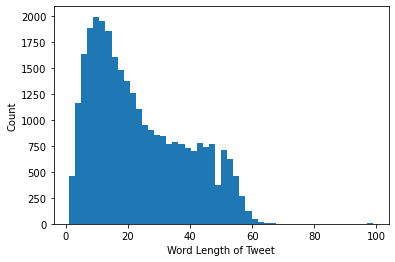

In [16]:
plt.hist(df_clean['Word Length of Tweet'], bins=50)
plt.ylabel('Count')
plt.xlabel('Word Length of Tweet');
plt.show()

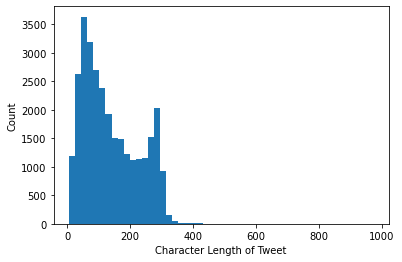

In [17]:
plt.hist(df_clean['Character Length of Tweet'], bins=50)
plt.ylabel('Count')
plt.xlabel('Character Length of Tweet');
plt.show()

In [24]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df_clean['Cleaned Content'] = df_clean['content'].apply(clean)

#Remove url
df_clean['Cleaned Content'] = df_clean['Cleaned Content'].str.replace('http\S+|www.\S+', '', case=False)


df_clean

<ipython-input-24-914aacd1c37a>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['Cleaned Content'] = df_clean['Cleaned Content'].str.replace('http\S+|www.\S+', '', case=False)


,url,date,Character Length of Tweet,Word Length of Tweet,content,id,user,replyCount,retweetCount,likeCount,conversationId,lang,sourceLabel,place,Cleaned Content
0,https://twitter.com/kinanabb/status/1266519684...,2020-05-29 23:59:58+00:00,30,6,cover letters stress me out :),1266519684695969792,"{'username': 'kinanabb', 'id': 747911479282794...",1,1,5,1266519684695969792,en,Twitter for iPhone,NaN,cover letters stress me out
1,https://twitter.com/bsprntr2b/status/126651967...,2020-05-29 23:59:56+00:00,208,38,@StuBishop_LPD Thanks and prayers to you and y...,1266519678769344512,"{'username': 'bsprntr2b', 'id': 31551973, 'dis...",0,0,1,1266514781311205376,en,Twitter for iPhone,NaN,StuBishop LPD Thanks and prayers to you and y...
2,https://twitter.com/Lisaandbarry777/status/126...,2020-05-29 23:59:52+00:00,322,39,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,1266519659039395840,"{'username': 'Lisaandbarry777', 'id': 91679958...",0,1,2,1266355238845534213,en,Twitter for Android,NaN,JoyceWhiteVance ShellyL Let s see Job loss he...
3,https://twitter.com/ultlingzi/status/126651965...,2020-05-29 23:59:51+00:00,46,8,@cezkiethh Im trying like im really stressed 😭,1266519656841568258,"{'username': 'ultlingzi', 'id': 12592257299480...",1,0,1,1266517273092796417,en,Twitter for iPhone,NaN,cezkiethh Im trying like im really stressed
4,https://twitter.com/fichuntie/status/126651965...,2020-05-29 23:59:51+00:00,122,18,@WynterStorm24 take care of yourself! this str...,1266519654773776384,"{'username': 'fichuntie', 'id': 10802272365093...",0,0,0,1266454440174931969,en,Twitter Web App,NaN,WynterStorm take care of yourself this stress...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/_jazzydimplezz/status/1448...,2021-10-14 20:27:38+00:00,19,4,I’m stressed tf out,1448747346381074436,"{'username': '_jazzydimplezz', 'id': 104191704...",0,0,0,1448747346381074436,en,Twitter for iPhone,NaN,I m stressed tf out
29996,https://twitter.com/iamtoriwells/status/144874...,2021-10-14 20:27:35+00:00,113,22,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,1448747335333425153,"{'username': 'iamtoriwells', 'id': 146147326, ...",0,0,0,1448747335333425153,en,Twitter for iPhone,NaN,Mannnn S E amp of HTGAWM got me stressed tf ou...
29997,https://twitter.com/StleKvale/status/144874733...,2021-10-14 20:27:35+00:00,104,19,"@dawn15765 Yes you learn of course, but they a...",1448747335278804997,"{'username': 'StleKvale', 'id': 331904434, 'di...",0,0,1,1448740274801463298,en,Twitter Web App,NaN,dawn Yes you learn of course but they are sti...
29998,https://twitter.com/Learner4ever01/status/1448...,2021-10-14 20:27:31+00:00,266,47,@MTradess Most important step has been achieve...,1448747316169658372,"{'username': 'Learner4ever01', 'id': 142849267...",0,0,1,1448747316169658372,en,Twitter for Android,NaN,MTradess Most important step has been achieve...


In [25]:
#Tokenization
df_clean['Tokenized Content'] = df_clean.apply(lambda row: nltk.word_tokenize(row['Cleaned Content']), axis=1)

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(tokenized_sents):
    tags = pos_tag(tokenized_sents)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df_clean['POS tagged'] = df_clean['Tokenized Content'].apply(token_stop_pos)


#lematization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df_clean['Lemma'] = df_clean['POS tagged'].apply(lemmatize)
df_clean

,url,date,Character Length of Tweet,Word Length of Tweet,content,id,user,replyCount,retweetCount,likeCount,conversationId,lang,sourceLabel,place,Cleaned Content,Tokenized Content,POS tagged,Lemma
0,https://twitter.com/kinanabb/status/1266519684...,2020-05-29 23:59:58+00:00,30,6,cover letters stress me out :),1266519684695969792,"{'username': 'kinanabb', 'id': 747911479282794...",1,1,5,1266519684695969792,en,Twitter for iPhone,NaN,cover letters stress me out,"[cover, letters, stress, me, out]","[(cover, n), (letters, n), (stress, v)]",cover letter stress
1,https://twitter.com/bsprntr2b/status/126651967...,2020-05-29 23:59:56+00:00,208,38,@StuBishop_LPD Thanks and prayers to you and y...,1266519678769344512,"{'username': 'bsprntr2b', 'id': 31551973, 'dis...",0,0,1,1266514781311205376,en,Twitter for iPhone,NaN,StuBishop LPD Thanks and prayers to you and y...,"[StuBishop, LPD, Thanks, and, prayers, to, you...","[(StuBishop, n), (LPD, n), (Thanks, n), (praye...",StuBishop LPD Thanks prayer family please kn...
2,https://twitter.com/Lisaandbarry777/status/126...,2020-05-29 23:59:52+00:00,322,39,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,1266519659039395840,"{'username': 'Lisaandbarry777', 'id': 91679958...",0,1,2,1266355238845534213,en,Twitter for Android,NaN,JoyceWhiteVance ShellyL Let s see Job loss he...,"[JoyceWhiteVance, ShellyL, Let, s, see, Job, l...","[(JoyceWhiteVance, n), (ShellyL, n), (Let, n),...",JoyceWhiteVance ShellyL Let see Job loss hea...
3,https://twitter.com/ultlingzi/status/126651965...,2020-05-29 23:59:51+00:00,46,8,@cezkiethh Im trying like im really stressed 😭,1266519656841568258,"{'username': 'ultlingzi', 'id': 12592257299480...",1,0,1,1266517273092796417,en,Twitter for iPhone,NaN,cezkiethh Im trying like im really stressed,"[cezkiethh, Im, trying, like, im, really, stre...","[(cezkiethh, n), (Im, n), (trying, v), (like, ...",cezkiethh Im try like im really stress
4,https://twitter.com/fichuntie/status/126651965...,2020-05-29 23:59:51+00:00,122,18,@WynterStorm24 take care of yourself! this str...,1266519654773776384,"{'username': 'fichuntie', 'id': 10802272365093...",0,0,0,1266454440174931969,en,Twitter Web App,NaN,WynterStorm take care of yourself this stress...,"[WynterStorm, take, care, of, yourself, this, ...","[(WynterStorm, n), (take, v), (care, n), (stre...",WynterStorm take care stress need break sill...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/_jazzydimplezz/status/1448...,2021-10-14 20:27:38+00:00,19,4,I’m stressed tf out,1448747346381074436,"{'username': '_jazzydimplezz', 'id': 104191704...",0,0,0,1448747346381074436,en,Twitter for iPhone,NaN,I m stressed tf out,"[I, m, stressed, tf, out]","[(stressed, v), (tf, n)]",stress tf
29996,https://twitter.com/iamtoriwells/status/144874...,2021-10-14 20:27:35+00:00,113,22,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,1448747335333425153,"{'username': 'iamtoriwells', 'id': 146147326, ...",0,0,0,1448747335333425153,en,Twitter for iPhone,NaN,Mannnn S E amp of HTGAWM got me stressed tf ou...,"[Mannnn, S, E, amp, of, HTGAWM, got, me, stres...","[(Mannnn, n), (E, n), (amp, n), (HTGAWM, n), (...",Mannnn E amp HTGAWM get stress tf episode li...
29997,https://twitter.com/StleKvale/status/144874733...,2021-10-14 20:27:35+00:00,104,19,"@dawn15765 Yes you learn of course, but they a...",1448747335278804997,"{'username': 'StleKvale', 'id': 331904434, 'di...",0,0,1,1448740274801463298,en,Twitter Web App,NaN,dawn Yes you learn of course but they are sti...,"[dawn, Yes, you, learn, of, course, but, they,...","[(dawn, n), (Yes, n), (learn, v), (course, n),...",dawn Yes learn course still tricky get stres...
29998,https://twitter.com/Learner4ever01/status/1448...,2021-10-14 20:27:31+00:00,266,47,@MTradess Most important step has been achieve...,1448747316169658372,"{'username': 'Learner4ever01', 'id': 142849267...",0,0,1,1448747316169658372,en,Twitter for Android,NaN,MTradess Most important step has been

In [26]:
#Subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Polarity to know how positive or negative the text is
def getpolarity(text):
     return TextBlob(text).sentiment.polarity
    
df_clean['Subjectivity'] = df_clean['Lemma'].apply(getsubjectivity)
df_clean['Polarity'] = df_clean['Lemma'].apply(getpolarity)    

#Compue negative, neutral and positive analysis
def analysis(points):
    if points < 0:
        return 'Negative'
    elif points == 0:
        return 'Neutral'
    else:
        return 'Positive'
df_clean['Analysis'] = df_clean['Polarity'].apply(analysis)

df_clean

,url,date,Character Length of Tweet,Word Length of Tweet,content,id,user,replyCount,retweetCount,likeCount,...,lang,sourceLabel,place,Cleaned Content,Tokenized Content,POS tagged,Lemma,Subjectivity,Polarity,Analysis
0,https://twitter.com/kinanabb/status/1266519684...,2020-05-29 23:59:58+00:00,30,6,cover letters stress me out :),1266519684695969792,"{'username': 'kinanabb', 'id': 747911479282794...",1,1,5,...,en,Twitter for iPhone,NaN,cover letters stress me out,"[cover, letters, stress, me, out]","[(cover, n), (letters, n), (stress, v)]",cover letter stress,0.000000,0.000000,Neutral
1,https://twitter.com/bsprntr2b/status/126651967...,2020-05-29 23:59:56+00:00,208,38,@StuBishop_LPD Thanks and prayers to you and y...,1266519678769344512,"{'username': 'bsprntr2b', 'id': 31551973, 'dis...",0,0,1,...,en,Twitter for iPhone,NaN,StuBishop LPD Thanks and prayers to you and y...,"[StuBishop, LPD, Thanks, and, prayers, to, you...","[(StuBishop, n), (LPD, n), (Thanks, n), (praye...",StuBishop LPD Thanks prayer family please kn...,0.650000,0.330000,Positive
2,https://twitter.com/Lisaandbarry777/status/126...,2020-05-29 23:59:52+00:00,322,39,@JoyceWhiteVance @ShellyL27525853 Let's see\n-...,1266519659039395840,"{'username': 'Lisaandbarry777', 'id': 91679958...",0,1,2,...,en,Twitter for Android,NaN,JoyceWhiteVance ShellyL Let s see Job loss he...,"[JoyceWhiteVance, ShellyL, Let, s, see, Job, l...","[(JoyceWhiteVance, n), (ShellyL, n), (Let, n),...",JoyceWhiteVance ShellyL Let see Job loss hea...,0.293750,-0.035417,Negative
3,https://twitter.com/ultlingzi/status/126651965...,2020-05-29 23:59:51+00:00,46,8,@cezkiethh Im trying like im really stressed 😭,1266519656841568258,"{'username': 'ultlingzi', 'id': 12592257299480...",1,0,1,...,en,Twitter for iPhone,NaN,cezkiethh Im trying like im really stressed,"[cezkiethh, Im, trying, like, im, really, stre...","[(cezkiethh, n), (Im, n), (trying, v), (like, ...",cezkiethh Im try like im really stress,0.200000,0.200000,Positive
4,https://twitter.com/fichuntie/status/126651965...,2020-05-29 23:59:51+00:00,122,18,@WynterStorm24 take care of yourself! this str...,1266519654773776384,"{'username': 'fichuntie', 'id': 10802272365093...",0,0,0,...,en,Twitter Web App,NaN,WynterStorm take care of yourself this stress...,"[WynterStorm, take, care, of, yourself, this, ...","[(WynterStorm, n), (take, v), (care, n), (stre...",WynterStorm take care stress need break sill...,0.687500,-0.050000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/_jazzydimplezz/status/1448...,2021-10-14 20:27:38+00:00,19,4,I’m stressed tf out,1448747346381074436,"{'username': '_jazzydimplezz', 'id': 104191704...",0,0,0,...,en,Twitter for iPhone,NaN,I m stressed tf out,"[I, m, stressed, tf, out]","[(stressed, v), (tf, n)]",stress tf,0.000000,0.000000,Neutral
29996,https://twitter.com/iamtoriwells/status/144874...,2021-10-14 20:27:35+00:00,113,22,Mannnn S4:E8 &amp; 9 of HTGAWM got me stressed...,1448747335333425153,"{'username': 'iamtoriwells', 'id': 146147326, ...",0,0,0,...,en,Twitter for iPhone,NaN,Mannnn S E amp of HTGAWM got me stressed tf ou...,"[Mannnn, S, E, amp, of, HTGAWM, got, me, stres...","[(Mannnn, n), (E, n), (amp, n), (HTGAWM, n), (...",Mannnn E amp HTGAWM get stress tf episode li...,0.000000,0.000000,Neutral
29997,https://twitter.com/StleKvale/status/144874733...,2021-10-14 20:27:35+00:00,104,19,"@dawn15765 Yes you learn of course, but they a...",1448747335278804997,"{'username': 'StleKvale', 'id': 331904434, 'di...",0,0,1,...,en,Twitter Web App,NaN,dawn Yes you learn of course but they are sti...,"[dawn, Yes, you, learn, of, course, but, they,...","[(dawn, n), (Yes, n), (learn, v), (course, n),...",dawn Yes learn course still tricky get stres...,0.000000,0.000000,Neutral
29998,https://twitter.com/Learner4ever01/status/1448...,2021-10-14 20:27:31+00:00,266,47,@MTradess Most important step has been achieve...,1448747316169658372,"{'username': 'Learner4e

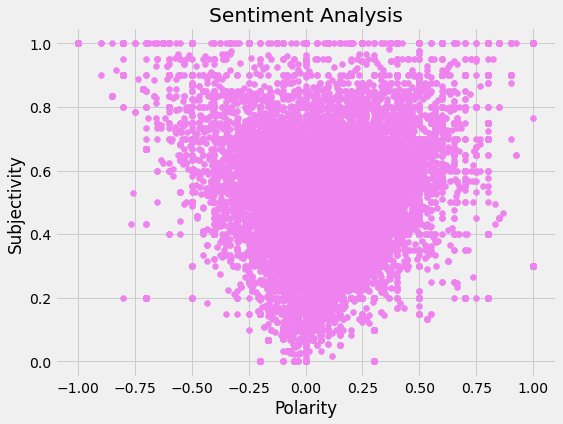

In [27]:
# Plot Subjectivity and Polarity

plt.figure(figsize=(8,6))
for i in range(0, df_clean.shape[0]):
    plt.scatter(df_clean['Polarity'][i], df_clean['Subjectivity'][i], color='violet')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [29]:
#Positive tweets percentage
positive_tweets = df_clean[df_clean.Analysis == 'Positive']
positive_tweets = positive_tweets['content']
print("Positive tweets Percentage: ")
round((positive_tweets.shape[0] / df_clean.shape[0])* 100, 1)

Positive tweets Percentage: 


43.8

In [30]:
#Negative tweets percentage
negative_tweets = df_clean[df_clean.Analysis == 'Negative']
negative_tweets = negative_tweets['content']
print("Negative tweets Percentage: ")
round((negative_tweets.shape[0] / df_clean.shape[0])* 100, 1)

Negative tweets Percentage: 


23.3

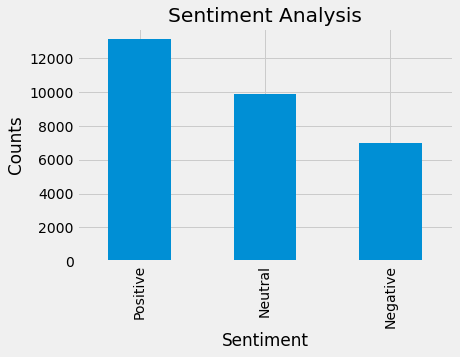

In [31]:
#Visualize the count

df_clean['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_clean['Analysis'].value_counts().plot(kind='bar')
plt.show()